# Introduction: This is a MVMDS test.

Multidimensional Scaling (MVMDS) is a useful multiview dimensionaltiy reduction algorithm that allows the user to perform Multidimensional Scaling on multiple views at the same time.

In [37]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import MVMDS
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [38]:
Xs, y = load_UCImultifeature()

# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


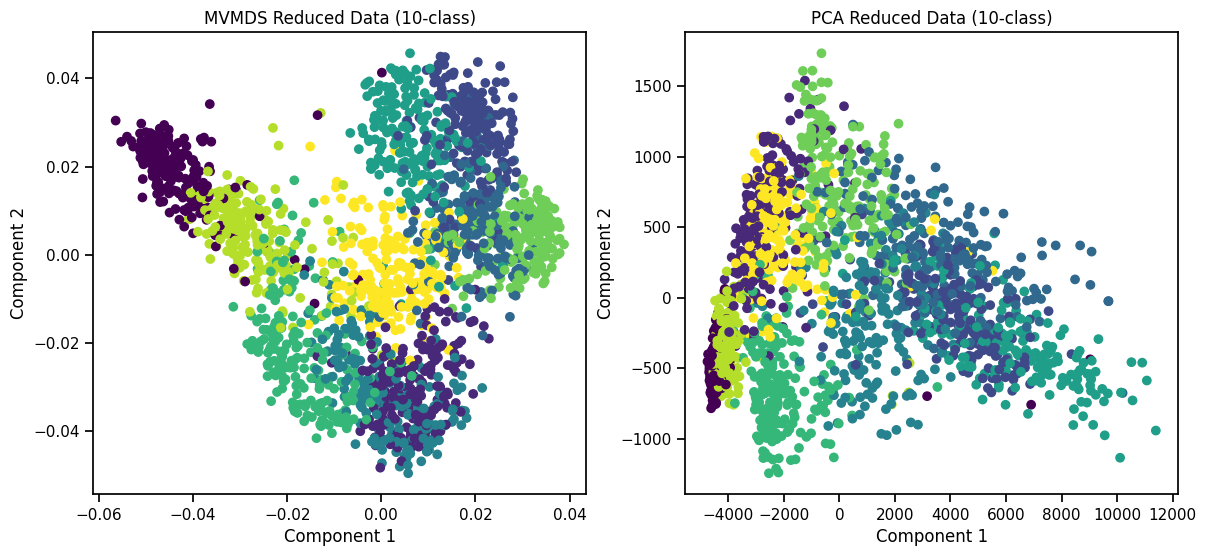

In [39]:
# MVMDS reduction
mvmds = MVMDS(n_components=2)
Xs_mvmds_reduced = mvmds.fit_transform(Xs)

# Concatenate views then PCA for comparison
Xs_concat = Xs[0]
for X in Xs[1:]:
    Xs_concat = np.hstack((Xs_concat, X))
pca = PCA(n_components=2)
Xs_pca_reduced = pca.fit_transform(Xs_concat)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(Xs_mvmds_reduced[:, 0], Xs_mvmds_reduced[:, 1], c=y)
ax[0].set_title("MVMDS Reduced Data (10-class)")
ax[0].set_xlabel("Component 1")
ax[0].set_ylabel("Component 2")
ax[1].scatter(Xs_pca_reduced[:, 0], Xs_pca_reduced[:, 1], c=y)
ax[1].set_title("PCA Reduced Data (10-class)")
ax[1].set_xlabel("Component 1")
ax[1].set_ylabel("Component 2")

plt.show()

# # 4-class data
# Xs_4, y_4 = load_UCImultifeature(select_labeled=[0, 1, 2, 3])

# # MVMDS reduction
# mvmds = MVMDS(n_components=2)
# Xs_mvmds_reduced = mvmds.fit_transform(Xs_4)

# # Concatenate views then PCA for comparison
# Xs_concat = Xs_4[0]
# for X in Xs_4[1:]:
#     Xs_concat = np.hstack((Xs_concat, X))
# pca = PCA(n_components=2)
# Xs_pca_reduced = pca.fit_transform(Xs_concat)

# fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# ax[0].scatter(Xs_mvmds_reduced[:, 0], Xs_mvmds_reduced[:, 1], c=y_4)
# ax[0].set_title("MVMDS Reduced Data (4-class)")
# ax[0].set_xlabel("Component 1")
# ax[0].set_ylabel("Component 2")
# ax[1].scatter(Xs_pca_reduced[:, 0], Xs_pca_reduced[:, 1], c=y_4)
# ax[1].set_title("PCA Reduced Data (4-class)")
# ax[1].set_xlabel("Component 1")
# ax[1].set_ylabel("Component 2")

# plt.show()